# Unit 5 - Financial Planning


In [43]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json


%matplotlib inline

In [44]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [45]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [46]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [55]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_data.content
formatted_data = btc_data.json()
print(json.dumps(formatted_data, indent=4))
btc_price = formatted_data["data"]["1"]["quotes"]["USD"]["price"]


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18520937,
            "total_supply": 18520937,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11457.45,
                    "volume_24h": 15431177557,
                    "market_cap": 212419074368,
                    "percentage_change_1h": 0.0014319441703728,
                    "percentage_change_24h": 1.00035271467836,
                    "percentage_change_7d": 1.51422296207238,
                    "percent_change_1h": 0.0014319441703728,
                    "percent_change_24h": 1.00035271467836,
                    "percent_change_7d": 1.51422296207238
                },
                "CAD": {
                    "price": 15112.37655,
                    "volume_24h": 20353723197.683,
                    

In [56]:
print(btc_price)

11457.45


In [58]:
# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_data.content
formatted1_data = eth_data.json()
print(json.dumps(formatted1_data, indent=4))
eth_price = formatted1_data["data"]["1027"]["quotes"]["USD"]["price"]

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113061933,
            "total_supply": 113061933,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 376.03,
                    "volume_24h": 8055039709,
                    "market_cap": 42527535131,
                    "percentage_change_1h": -0.028360453365569,
                    "percentage_change_24h": 2.24173045490836,
                    "percentage_change_7d": 1.50045641223001,
                    "percent_change_1h": -0.028360453365569,
                    "percent_change_24h": 2.24173045490836,
                    "percent_change_7d": 1.50045641223001
                },
                "CAD": {
                    "price": 495.98357,
                    "volume_24h": 10624597376.171,
                    "ma

In [59]:
print(eth_price)

376.03


In [62]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your crypto portolfio ${my_crypto:0.2f}")
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your crypto portolfio $15741.90
The current value of your 1.2 BTC is $13748.94
The current value of your 5.3 ETH is $1992.96


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [63]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [64]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#Verify keys corrected loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [75]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-15 00:00:00-04:00  118.15  118.15  117.96  117.97  4988612  343.71   

                                                             
                             high     low   close    volume  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51  50665477

In [85]:
# Preview DataFrame
df_porfolio=pd.DataFrame()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-15 00:00:00-04:00  118.15  118.15  117.96  117.97  4988612  343.71   

                                                             
                             high     low   close    volume  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51  50665477

In [87]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $347.51


In [97]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
my_shares = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17375.50
The current value of your 200 AGG shares is $23594.00


### Savings Health Analysis

In [101]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
my_assets = ["crypto", "shares"]
value = {"amount":(my_crypto, my_shares)}
df_savings = pd.DataFrame(value, index=my_assets)
         
# Display savings DataFrame
display(df_savings)

,amount
crypto,15741.899
shares,40969.500


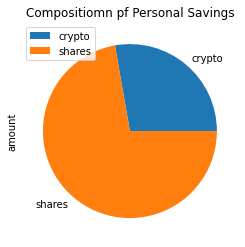

In [118]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Compositiomn pf Personal Savings")

In [132]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savingspri
my_savings = my_crypto + my_shares

savings_short = my_savings - emergency_fund

# Validate saving health
if my_savings > emergency_fund:
    print(f"Congrats! you have enough funds")
elif my_savings == emergency_fund:
    print(f"Congrats! you have reached your goal")
elif savings_short < 0:
    print(f"You are short $ (savings_short)")
        
print(f"Your emergency funds are ${emergency_fund}")       
print(f"Your savings are ${my_savings:.2f}")  
  

Congrats! you have enough funds
Your emergency funds are $36000
Your savings are $56711.40


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [136]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [138]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [156]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_Traditional = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Print the simulation input data
MC_Traditional.portfolio_data.head()

MC_Traditional.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008242,0.999935,1.012440,0.992467,0.995665,1.006782,0.991778,1.003811,0.998870,1.004246,...,1.002854,0.991624,1.015619,0.997746,0.995105,1.007183,1.010039,1.016210,0.998398,1.004149
2,1.007409,0.996569,1.015649,0.992887,0.998677,0.987123,0.985990,1.001333,1.011322,1.009999,...,1.002527,0.985799,1.026978,1.003165,0.993224,1.018139,1.005627,1.013624,1.010753,1.000854
3,1.002721,1.000167,1.018259,0.981325,0.992421,0.991069,0.986116,0.999353,1.009421,1.008616,...,0.997925,0.995824,1.044315,0.995352,1.001670,1.032370,1.004191,1.011721,1.007802,0.997215
4,1.012818,0.997013,1.019125,0.984905,0.993641,1.001725,0.988797,1.005172,1.019033,1.030934,...,0.997721,1.010283,1.041319,0.986247,1.010505,1.035035,0.998425,1.012875,1.008534,1.002910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.516113,3.791813,4.382771,0.838550,11.955681,15.174993,5.967079,4.740649,6.028466,3.676889,...,11.319979,14.001734,14.638039,6.510076,5.549885,15.326044,11.277435,9.567781,3.906970,7.275124
7557,7.497860,3.781190,4.430045,0.847053,11.996555,15.134144,5.992316,4.752173,5.989857,3.695337,...,11.244506,14.063432,14.754644,6.542130,5.605114,15.193192,11.116179,9.561149,3.936999,7.241309
7558,7.571164,3.787910,4.374870,0.849623,11.970443,15.093140,5.981506,4.737109,6.037529,3.714101,...,11.267201,14.063539,14.773831,6.602472,5.608277,15.259886,11.388205,9.725019,3.902362,7.212709
7559,7.544854,3.758540,4.357424,0.852306,12.049011,14.988756,5.974302,4.660683,6.065946,3.708897,...,11.152415,14.182354,14.868097,6.635586,5.586355,15.176211,11.417845,9.572846,3.905363,7.245963


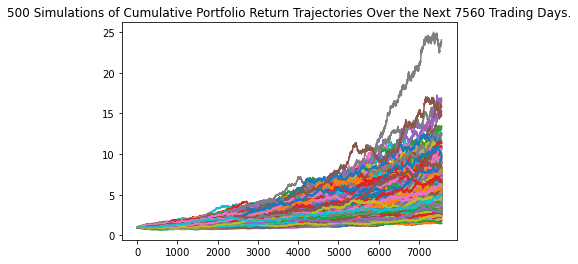

In [147]:
# Plot simulation outcomes
line_plot = MC_Traditional.plot_simulation()

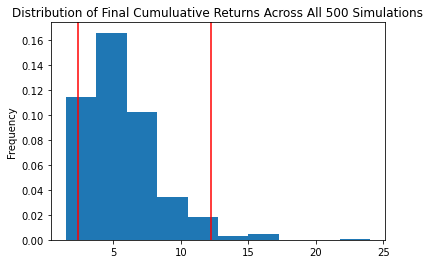

In [148]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Traditional.plot_distribution()

### Retirement Analysis

In [150]:
# Fetch summary statistics from the Monte Carlo simulation results
Traditional_tbl = MC_Traditional.summarize_cumulative_return()

# Print summary statistics
print(Traditional_tbl)

count           500.000000
mean              5.661676
std               2.712710
min               1.465314
25%               3.668152
50%               5.171279
75%               6.992755
max              24.024588
95% CI Lower      2.349016
95% CI Upper     12.254590
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [154]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Traditional_tbl[8]*initial_investment,2)
ci_upper = round(Traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46980.32 and $245091.8


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [155]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Traditional_tbl[8]*initial_investment,2)
ci_upper = round(Traditional_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70470.48 and $367637.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [157]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Traditional5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

# Print the simulation input data
MC_Traditional5.portfolio_data.head()



AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [158]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_Traditional5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998610,1.000501,1.000808,1.002278,1.011858,1.008653,1.005750,1.000050,1.000732,1.000081,...,1.000209,1.001682,0.997219,1.005580,0.985611,0.995337,0.995537,1.002066,1.000562,0.991372
2,0.990981,1.008306,0.998161,1.001890,1.010339,1.006694,1.000062,1.000490,0.998330,1.005445,...,1.007214,0.993174,0.996859,0.992522,0.994534,0.990149,1.006201,1.005982,0.983729,1.009726
3,0.998554,1.000482,1.002988,0.997748,1.011974,1.013659,1.006410,0.995665,1.003582,1.013347,...,0.999788,0.989222,1.001762,0.993946,0.991440,0.985784,0.993203,1.018045,0.976355,1.003471
4,1.003868,0.996284,0.997798,1.006271,1.009586,1.014406,0.998770,0.995274,1.005937,1.011814,...,0.994430,0.989355,1.001667,1.000792,0.978573,0.980175,0.996261,1.033556,0.990346,1.021568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.396846,1.649415,1.090730,1.673404,1.580880,1.505582,1.644011,1.101728,1.399727,1.716848,...,1.248499,1.172421,1.540452,0.765501,1.181965,1.312523,1.368552,1.502883,0.899642,1.702766
1257,1.382766,1.656786,1.083382,1.643027,1.586340,1.505076,1.647008,1.095043,1.415900,1.693228,...,1.235919,1.175434,1.534110,0.764997,1.206187,1.320047,1.367555,1.509019,0.891041,1.714909
1258,1.376438,1.649172,1.083103,1.656445,1.578246,1.501725,1.654935,1.098077,1.419159,1.677175,...,1.236041,1.174314,1.530275,0.771586,1.202856,1.310028,1.370413,1.495238,0.889690,1.698912
1259,1.362045,1.657736,1.086683,1.641174,1.593693,1.490691,1.643499,1.106941,1.425429,1.666142,...,1.228631,1.175619,1.533567,0.768770,1.204687,1.307083,1.372257,1.477045,0.898957,1.685903


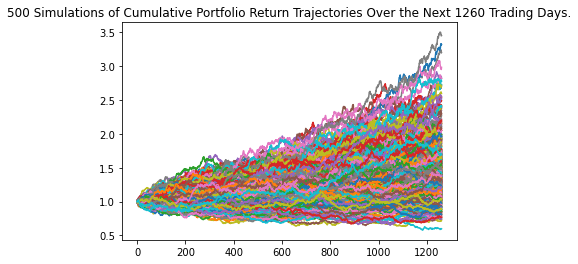

In [159]:
# Plot simulation outcomes
line_plot = MC_Traditional5.plot_simulation()

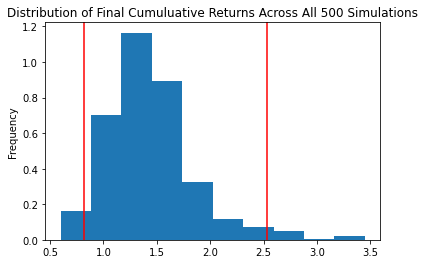

In [160]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Traditional5.plot_distribution()

In [162]:
# Fetch summary statistics from the Monte Carlo simulation results
Traditional5_tbl = MC_Traditional5.summarize_cumulative_return()

# Print summary statistics
print(Traditional5_tbl)


count           500.000000
mean              1.444473
std               0.413245
min               0.597755
25%               1.177057
50%               1.382820
75%               1.631120
max               3.447878
95% CI Lower      0.821502
95% CI Upper      2.528703
Name: 1260, dtype: float64


In [163]:
# Set initial investment
initial_investment5 = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower5 = round(Traditional_tbl[8]*initial_investment5,2)
ci_upper5 = round(Traditional_tbl[9]*initial_investment5,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower5} and ${ci_upper5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $134383.16 and $1596400.28


### Ten Years Retirement Option

In [164]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Traditional10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Print the simulation input data
MC_Traditional10.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [165]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_Traditional10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009228,0.994757,1.008936,1.000206,1.002573,1.004460,1.007984,1.012910,0.992512,1.014242,...,0.996847,0.991330,0.998126,1.003787,1.009210,0.994616,0.997867,0.987399,1.007678,1.014586
2,1.011883,1.012188,1.007992,1.012618,1.008106,1.007150,1.010249,1.002295,0.997702,1.017730,...,0.991100,0.989157,0.989532,1.002801,1.014098,0.998197,1.003779,0.980319,1.004368,1.016828
3,1.011238,1.014003,1.019008,1.015166,1.008344,1.005153,1.023689,1.007022,1.000983,1.010497,...,0.977845,0.983139,0.985675,1.003464,1.016653,0.999503,1.003251,0.981656,1.010351,1.019274
4,1.025335,1.002936,1.020462,1.010229,1.013039,1.002907,1.019727,1.022152,0.997822,1.020504,...,0.984311,0.981093,0.988744,1.005386,1.019203,0.996318,1.013713,0.998319,0.996455,1.025886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.669694,1.165100,2.469107,1.393463,2.270276,1.060015,2.017176,2.940735,1.910948,3.529997,...,3.366404,2.711055,1.188250,2.092074,1.159046,1.940386,2.154859,1.952161,3.596842,1.392178
2517,1.666807,1.153063,2.447510,1.388102,2.276400,1.053277,2.017293,2.961075,1.902592,3.536797,...,3.377144,2.698233,1.192899,2.084030,1.164673,1.942837,2.154132,1.946810,3.608086,1.396058
2518,1.655821,1.135573,2.446712,1.388222,2.285020,1.051295,2.000683,2.933008,1.894326,3.510419,...,3.362015,2.697830,1.197480,2.092176,1.181286,1.934764,2.127729,1.955743,3.650943,1.393506
2519,1.666045,1.119457,2.477214,1.386033,2.286656,1.051455,1.964326,2.965860,1.873009,3.505671,...,3.379606,2.694883,1.220370,2.085487,1.189867,1.938876,2.112968,1.983065,3.634339,1.409245


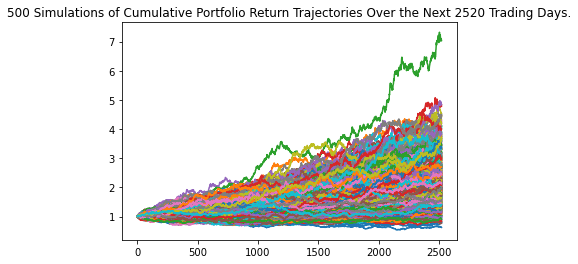

In [166]:
# Plot simulation outcomes
line_plot = MC_Traditional10.plot_simulation()

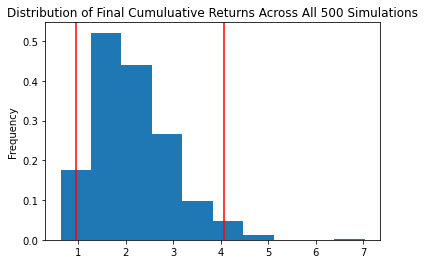

In [167]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Traditional10.plot_distribution()

In [168]:
# Fetch summary statistics from the Monte Carlo simulation results
Traditional10_tbl = MC_Traditional5.summarize_cumulative_return()

# Print summary statistics
print(Traditional10_tbl)

count           500.000000
mean              1.444473
std               0.413245
min               0.597755
25%               1.177057
50%               1.382820
75%               1.631120
max               3.447878
95% CI Lower      0.821502
95% CI Upper      2.528703
Name: 1260, dtype: float64


In [169]:
# Set initial investment
initial_investment10 = 20000 * .75

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower10 = round(Traditional_tbl[8]*initial_investment10,2)
ci_upper10 = round(Traditional_tbl[9]*initial_investment10,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower10} and ${ci_upper10}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $33595.79 and $399100.07
